## Import dependencies

In [1]:
!pip install opendatasets
!pip install pandas
import tensorflow as tf
import opendatasets as od
import pandas as pd
import numpy as np
import cv2 as cv
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
from PIL import Image

2023-06-16 18:27:47.039072: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Download the dataset from the Kaggle API
# od.download('https://www.kaggle.com/datasets/sagyamthapa/handwritten-math-symbols', force=True)

## Preprocess the Colors


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

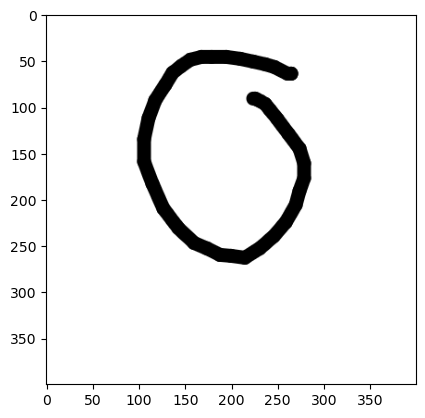

In [3]:
sample_img_path = os.path.join(os.curdir, 'handwritten-math-symbols', 'dataset', '0', '0CdBlhLw.png')
img = np.asarray(Image.open(sample_img_path))
imgplot = plt.imshow(img)
print(repr(img))
print(img.shape)

In [4]:
# Convert from CMYK to Gray scale
data_dir = os.path.join(os.curdir, 'handwritten-math-symbols', 'dataset')

for image_class in os.listdir(data_dir):
  if image_class.startswith('.'):
    continue
  for image in os.listdir(os.path.join(data_dir, image_class)):
    try:
      image_path = os.path.join(data_dir, image_class, image)
      image = cv.imread(image_path)
      grayImage = cv.cvtColor(image, cv.COLOR_RGBA2RGB)
      cv.imwrite(image_path, grayImage)
    except:
      continue

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

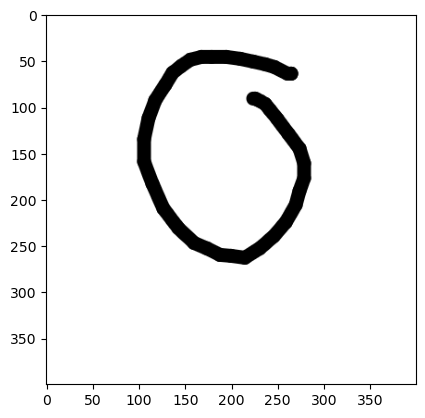

In [5]:
img = np.asarray(Image.open(sample_img_path))
imgplot = plt.imshow(img)
print(repr(img))
print(img.shape)

In [6]:
batch_size = 8
image_size = (32,32)
data_set = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size = batch_size, image_size = image_size)

Found 10071 files belonging to 19 classes.


In [7]:
print(repr(img))
print(img.shape)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Preprocess data set

In [8]:
from matplotlib.image import imread
imread(sample_img_path)

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [9]:
# Normalize images
data_set = data_set.map(lambda x,y: (x/255, y))


In [10]:
input_shape=(32,32,3)

train_size = int(len(data_set)* .7)
val_size = int(len(data_set)*.2)+1
test_size = int(len(data_set)*.1)+1

In [11]:
train = data_set.take(train_size)
val = data_set.skip(train_size).take(val_size)
test = data_set.skip(train_size + val_size).take(test_size)

## Create Model using Tensorflow

In [12]:
tf_model = models.Sequential()

# Convolutional base
tf_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
tf_model.add(layers.MaxPooling2D((2, 2)))
tf_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
tf_model.add(layers.MaxPooling2D((2, 2)))
tf_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense layers
tf_model.add(layers.Flatten())
tf_model.add(layers.Dense(64, activation='relu'))
tf_model.add(layers.Dense(19))
tf_model.summary()

# The summary shows that the convolutional base has a (4, 4, 64) output, which
#   is flattened into a (1024) shaped vector, and then sent through two Dense
#   layers

tf_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

tf_history = tf_model.fit(train, epochs=10,
                    validation_data=val)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

2023-06-16 18:28:08.986932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10071]
	 [[{{node Placeholder/_4}}]]
2023-06-16 18:28:08.987933: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10071]
	 [[{{node Placeholder/_4}}]]


879/881 [============================>.] - ETA: 0s - loss: 1.3263 - accuracy: 0.5953

2023-06-16 18:28:19.528309: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10071]
	 [[{{node Placeholder/_0}}]]
2023-06-16 18:28:19.529140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10071]
	 [[{{node Placeholder/_4}}]]


881/881 [==============================] - 15s 16ms/step - loss: 1.3239 - accuracy: 0.5959 - val_loss: 0.5387 - val_accuracy: 0.8328
Epoch 2/10
881/881 [==============================] - 16s 18ms/step - loss: 0.4075 - accuracy: 0.8753 - val_loss: 0.3823 - val_accuracy: 0.8849
Epoch 3/10
881/881 [==============================] - 15s 17ms/step - loss: 0.2347 - accuracy: 0.9251 - val_loss: 0.3890 - val_accuracy: 0.8869
Epoch 4/10
881/881 [==============================] - 15s 17ms/step - loss: 0.1585 - accuracy: 0.9464 - val_loss: 0.2753 - val_accuracy: 0.9256
Epoch 5/10
881/881 [==============================] - 16s 19ms/step - loss: 0.1230 - accuracy: 0.9604 - val_loss: 0.2811 - val_accuracy: 0.9276
Epoch 6/10
881/881 [==============================] - 18s 21ms/step - loss: 0.0831 - accuracy: 0.9726 - val_loss: 0.3119 - val_accuracy: 0.9211
Epoch 7/10
881/881 [==============================] - 21s 23ms/step - loss: 0.0721 - accuracy: 0.9766 - val_loss: 0.4296 - val_accuracy: 0.9132
Epo

2023-06-16 18:30:56.074141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10071]
	 [[{{node Placeholder/_0}}]]
2023-06-16 18:30:56.074774: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10071]
	 [[{{node Placeholder/_4}}]]


126/126 - 4s - loss: 0.2439 - accuracy: 0.9315 - 4s/epoch - 32ms/step


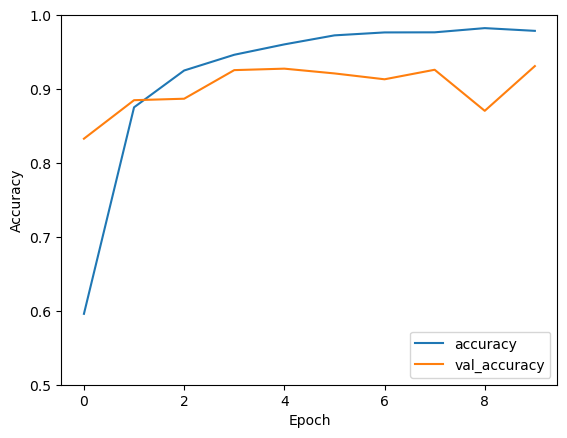

In [13]:
plt.plot(tf_history.history['accuracy'], label='accuracy')
plt.plot(tf_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = tf_model.evaluate(test, verbose=2)

## Create Model using Resnet-50

In [14]:
img_height = 32
img_width = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(

  data_dir,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 10071 files belonging to 19 classes.
Using 8057 files for training.


In [15]:

# for image in train_ds:
#   print(image)

# images, _ = next(train_ds)
# plt.imshow(images[0])

In [16]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(

  data_dir,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 10071 files belonging to 19 classes.
Using 2014 files for validation.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

demo_resnet_model = Sequential()

pretrained_model_for_demo= tf.keras.applications.ResNet50(include_top=False,

                   input_shape=input_shape,

                   pooling='avg',classes=19,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)

In [18]:
demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))

demo_resnet_model.add(Dense(19, activation='softmax'))

In [19]:
demo_resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

epochs = 10
history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10


2023-06-16 18:31:05.648873: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8057]
	 [[{{node Placeholder/_0}}]]
2023-06-16 18:31:05.649323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8057]
	 [[{{node Placeholder/_0}}]]


1008/1008 [==============================] - ETA: 0s - loss: 0.9909 - accuracy: 0.7000

2023-06-16 18:32:27.897061: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2014]
	 [[{{node Placeholder/_4}}]]
2023-06-16 18:32:27.898086: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2014]
	 [[{{node Placeholder/_0}}]]


1008/1008 [==============================] - 105s 99ms/step - loss: 0.9909 - accuracy: 0.7000 - val_loss: 0.8115 - val_accuracy: 0.7339
Epoch 2/10
1008/1008 [==============================] - 88s 88ms/step - loss: 0.5462 - accuracy: 0.8148 - val_loss: 0.5543 - val_accuracy: 0.8203
Epoch 3/10
1008/1008 [==============================] - 88s 88ms/step - loss: 0.4504 - accuracy: 0.8498 - val_loss: 0.5705 - val_accuracy: 0.8242
Epoch 4/10
1008/1008 [==============================] - 109s 109ms/step - loss: 0.3814 - accuracy: 0.8723 - val_loss: 0.6820 - val_accuracy: 0.8004
Epoch 5/10
1008/1008 [==============================] - 115s 114ms/step - loss: 0.3268 - accuracy: 0.8871 - val_loss: 0.5224 - val_accuracy: 0.8411
Epoch 6/10
1008/1008 [==============================] - 109s 108ms/step - loss: 0.2884 - accuracy: 0.9013 - val_loss: 0.5472 - val_accuracy: 0.8466
Epoch 7/10
1008/1008 [==============================] - 132s 131ms/step - loss: 0.2440 - accuracy: 0.9201 - val_loss: 0.4531 - v

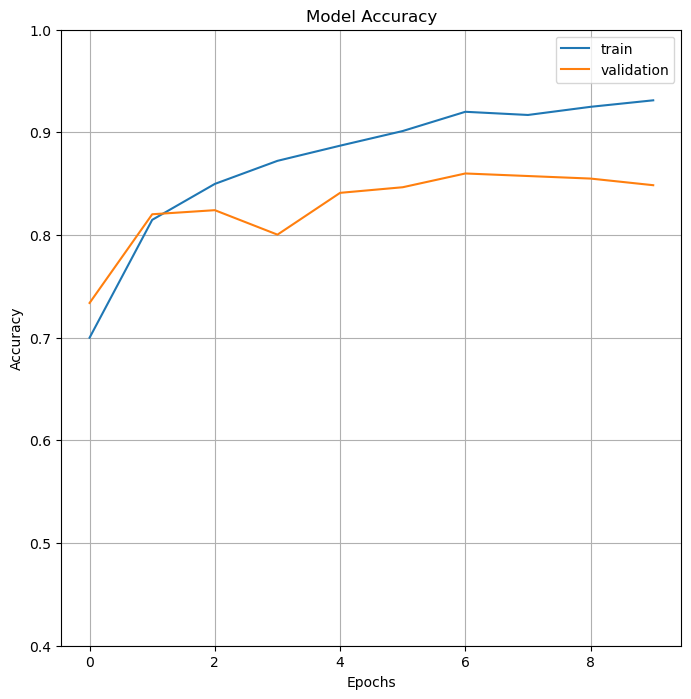

In [20]:
plt.figure(figsize=(8, 8))

epochs_range= range(epochs)

plt.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plt.axis(ymin=0.4,ymax=1)

plt.grid()

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

In [21]:
#plotter_lib.show()

plt.savefig('output-plot.png')

<Figure size 640x480 with 0 Axes>

## Create Model using MobileNet

In [22]:
# from tensorflow.keras.applications import MobileNetV2

In [23]:
# mobilenet_input_shape = (32, 32, 3)
# mobilenet_model = tf.keras.applications.MobileNetV2(include_top=False,
#                                                     input_shape=(224, 224, 3),
#                                                     pooling='avg',classes=19,
#                                                     weights='imagenet')


## Create Model using VGG19

In [24]:
from tensorflow.keras.applications import VGG19

In [25]:
vgg19_model = Sequential()

vgg19_pretrained_model= tf.keras.applications.VGG19(include_top=False,

                   input_shape=input_shape,

                   pooling='avg',classes=19,

                   weights='imagenet')

for each_layer in vgg19_pretrained_model.layers:
        each_layer.trainable=False

vgg19_model.add(vgg19_pretrained_model)

In [26]:
vgg19_model.add(Flatten())

vgg19_model.add(Dense(512, activation='relu'))

vgg19_model.add(Dense(19, activation='softmax'))

In [27]:
vgg19_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

epochs = 8
try:
  history = vgg19_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)
except Exception as e: print(e)

Epoch 1/8
1008/1008 [==============================] - 84s 82ms/step - loss: 2.2698 - accuracy: 0.7355 - val_loss: 0.9494 - val_accuracy: 0.8168
Epoch 2/8
1008/1008 [==============================] - 73s 72ms/step - loss: 0.5401 - accuracy: 0.8596 - val_loss: 0.6503 - val_accuracy: 0.8332
Epoch 3/8
1008/1008 [==============================] - 73s 73ms/step - loss: 0.4290 - accuracy: 0.8801 - val_loss: 0.7921 - val_accuracy: 0.8039
Epoch 4/8
1008/1008 [==============================] - 72s 72ms/step - loss: 0.3854 - accuracy: 0.8848 - val_loss: 0.8989 - val_accuracy: 0.8029
Epoch 5/8
1008/1008 [==============================] - 79s 78ms/step - loss: 0.3685 - accuracy: 0.8918 - val_loss: 0.8012 - val_accuracy: 0.8421
Epoch 6/8
1008/1008 [==============================] - 82s 81ms/step - loss: 0.3015 - accuracy: 0.9070 - val_loss: 0.5925 - val_accuracy: 0.8739
Epoch 7/8
1008/1008 [==============================] - 78s 77ms/step - loss: 0.2811 - accuracy: 0.9193 - val_loss: 0.6893 - val_ac

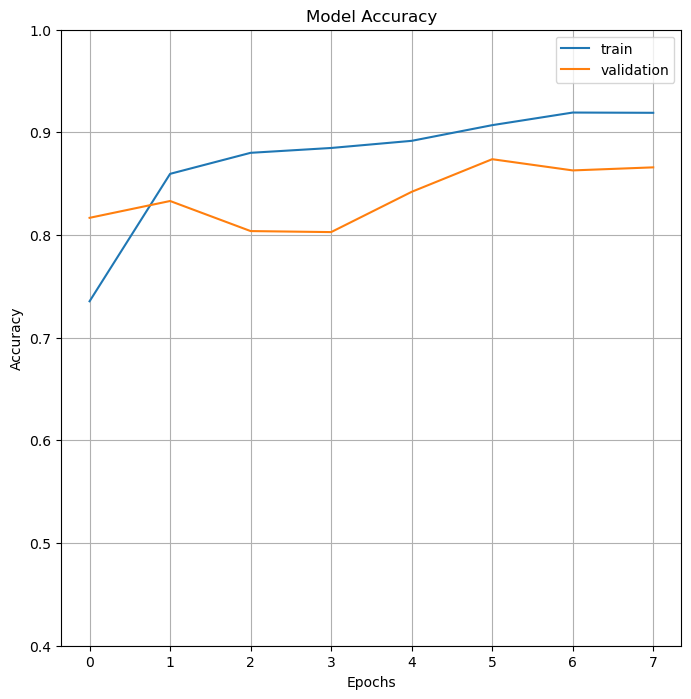

In [28]:
# Test

plt.figure(figsize=(8, 8))

epochs_range= range(epochs)

plt.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plt.axis(ymin=0.4,ymax=1)

plt.grid()

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

## Create Model using Inception

In [29]:
from tensorflow.keras.applications import inception_v3

In [30]:
# inception_model = Sequential()

# inception_pretrained_model= tf.keras.applications.Inception_v3(include_top=False,

#                    input_shape=input_shape,

#                    pooling='avg',classes=19,

#                    weights='imagenet')

# for each_layer in vgg19_pretrained_model.layers:
#         each_layer.trainable=False

# vgg19_model.add(vgg19_pretrained_model)